In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("brain_stroke.csv")

## Data Cleaning
### Handling Missing values


In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.shape

(4981, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df_col = df[['gender',  'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 
       'smoking_status', 'stroke']]

In [10]:
for i in df_col.columns:
    print(df_col[i].unique())
    

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [11]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [12]:
for i in df_col.columns:
    print(df_col[i].value_counts())

gender
Female    2907
Male      2074
Name: count, dtype: int64
hypertension
0    4502
1     479
Name: count, dtype: int64
heart_disease
0    4706
1     275
Name: count, dtype: int64
ever_married
Yes    3280
No     1701
Name: count, dtype: int64
work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64
Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64
smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64
stroke
0    4733
1     248
Name: count, dtype: int64


## Now visualization Part

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\135827593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = i, data = df_col, palette="hls")


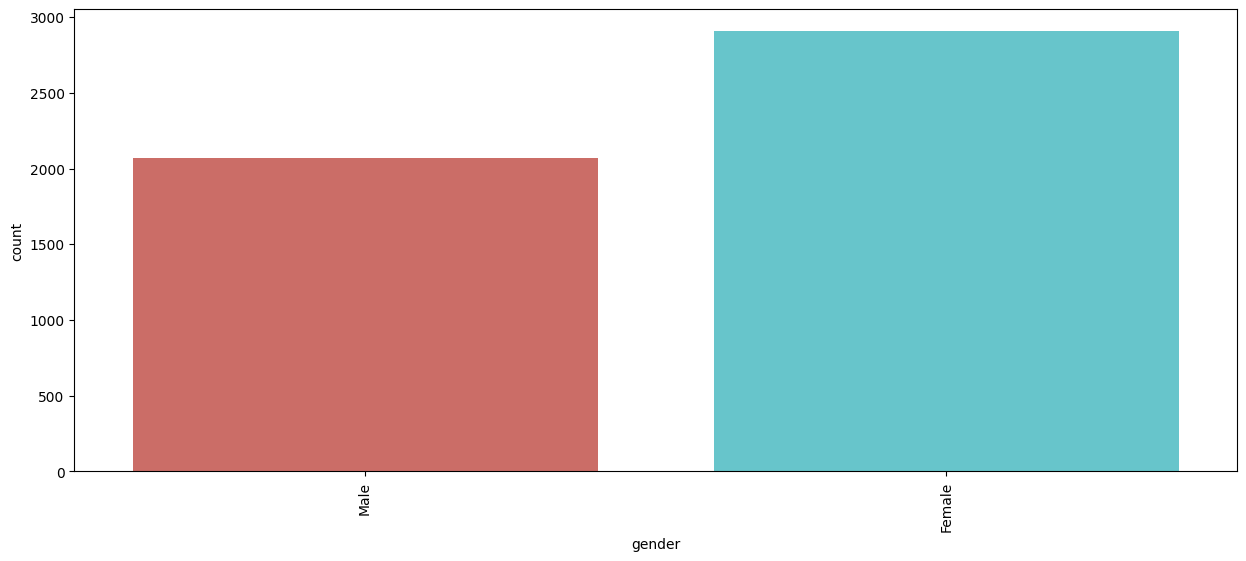

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\135827593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = i, data = df_col, palette="hls")


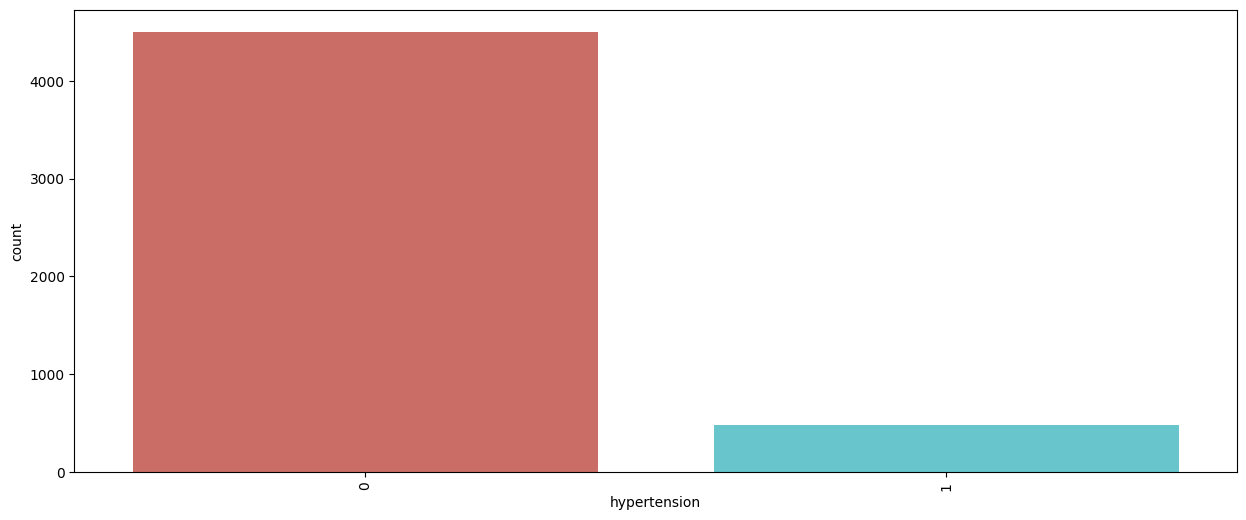

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\135827593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = i, data = df_col, palette="hls")


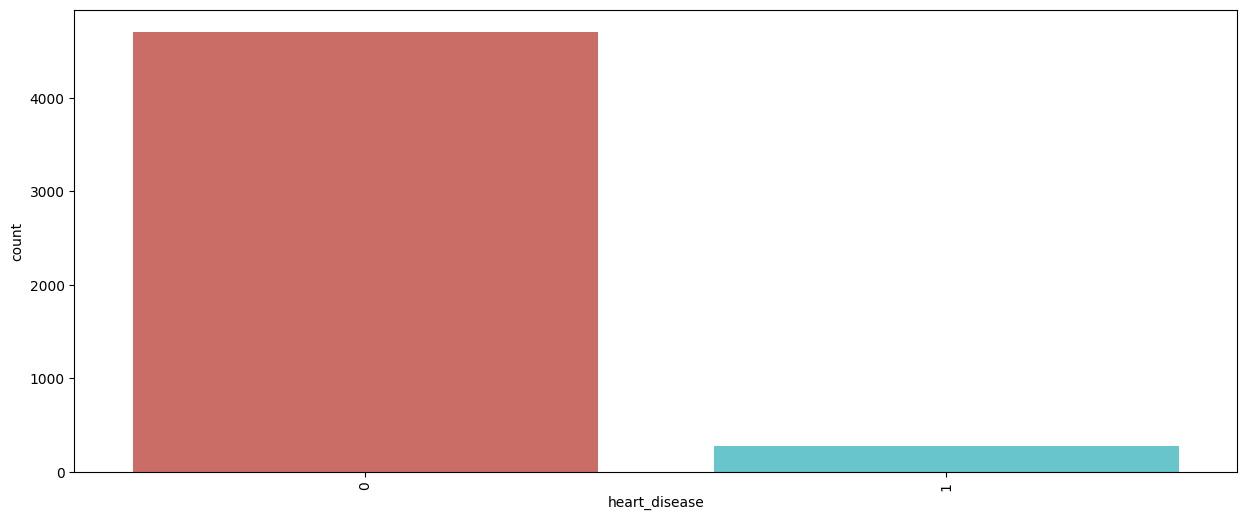

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\135827593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = i, data = df_col, palette="hls")


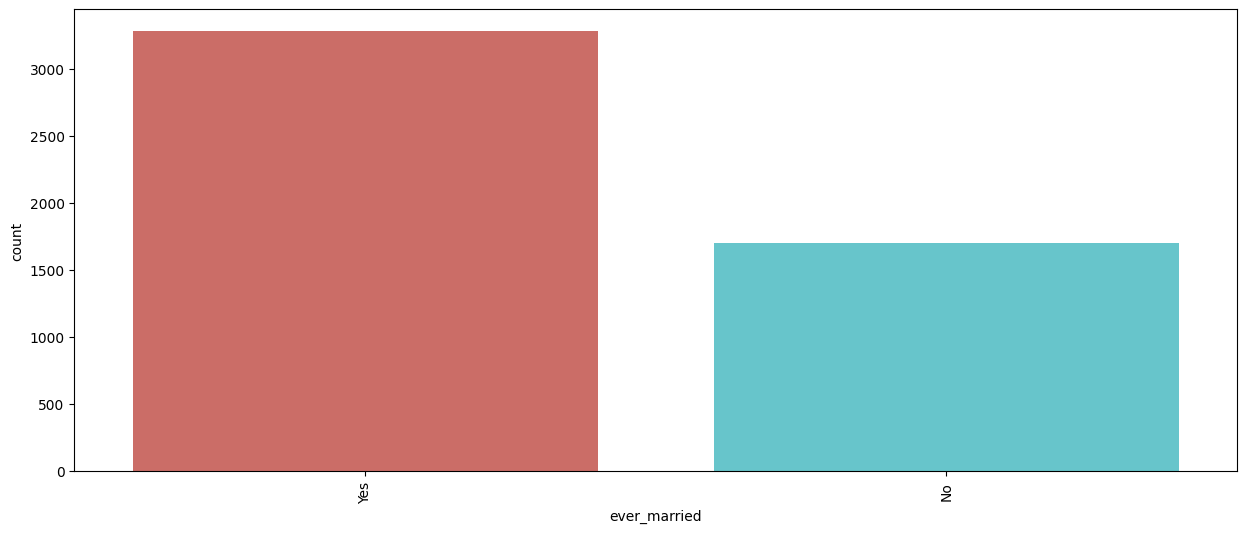

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\135827593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = i, data = df_col, palette="hls")


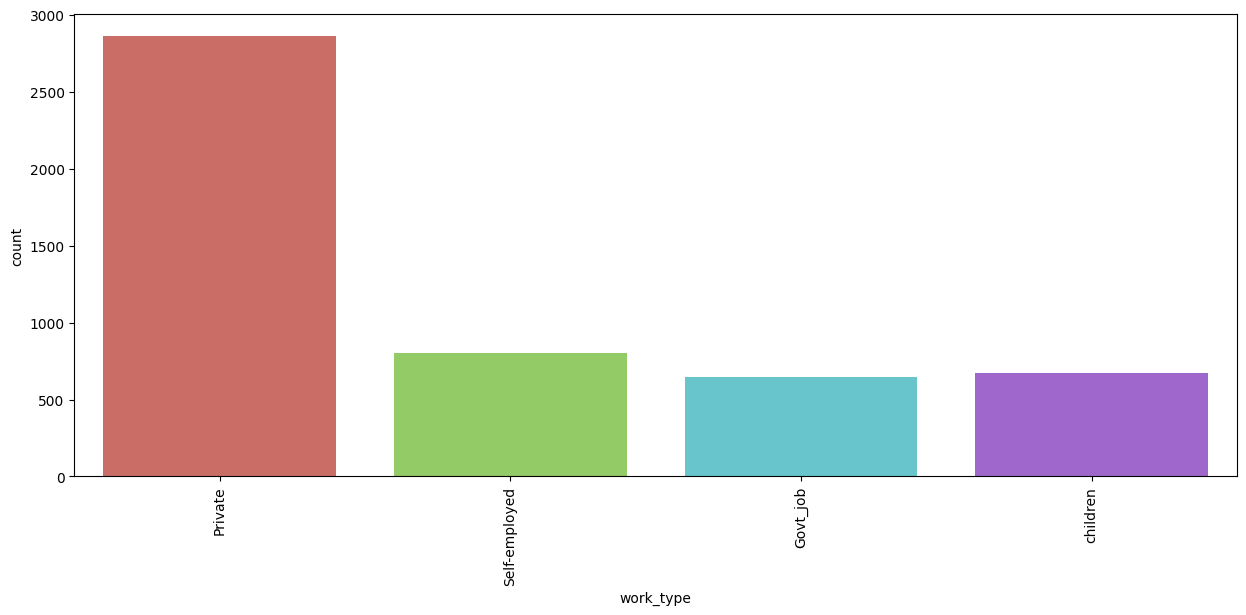

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\135827593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = i, data = df_col, palette="hls")


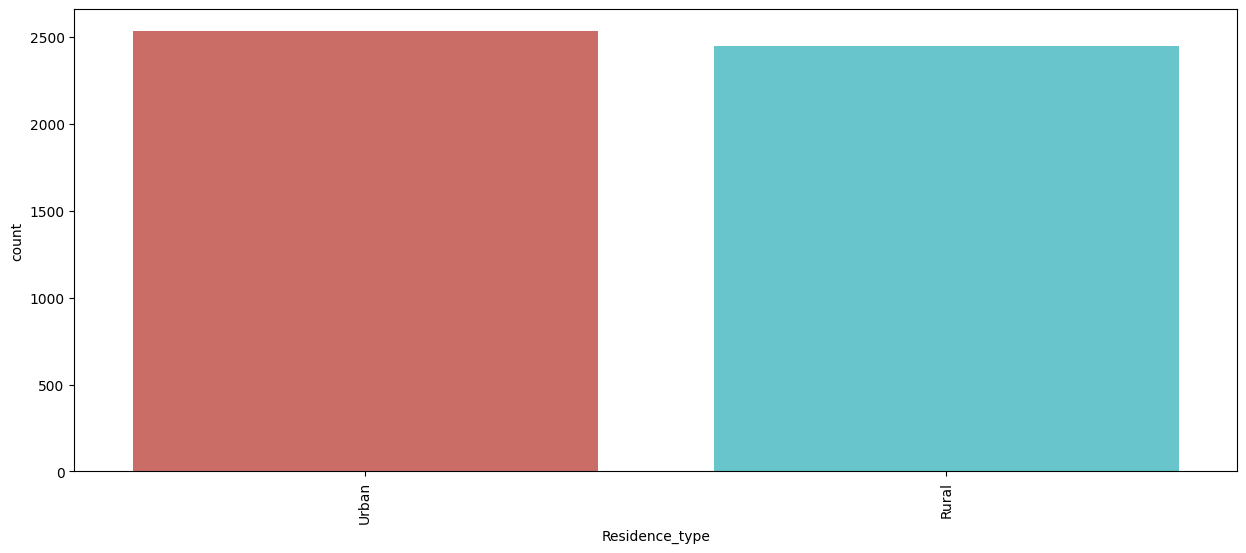

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\135827593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = i, data = df_col, palette="hls")


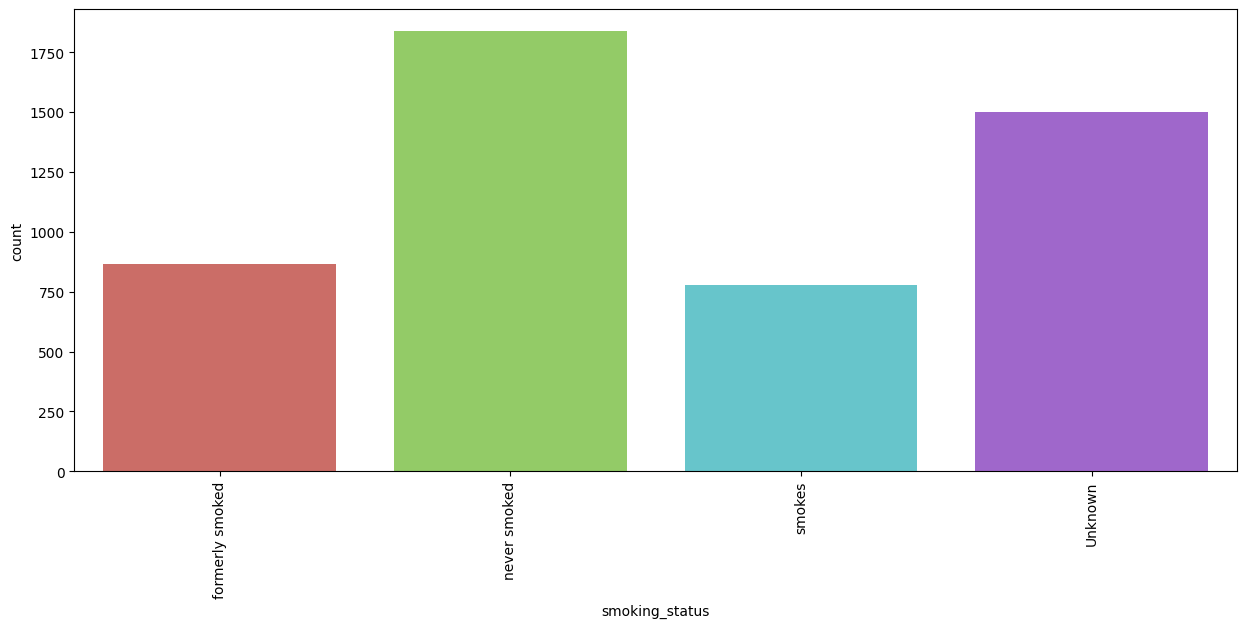

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\135827593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = i, data = df_col, palette="hls")


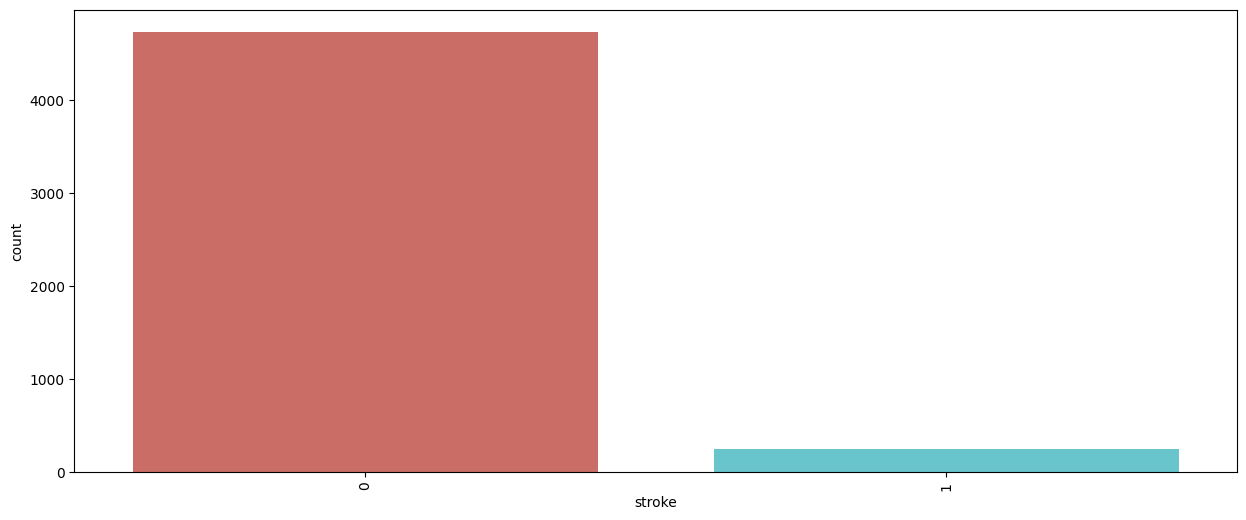

In [13]:
for i in df_col.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(x = i, data = df_col, palette="hls")
    plt.xticks(rotation = 90)
    plt.show()

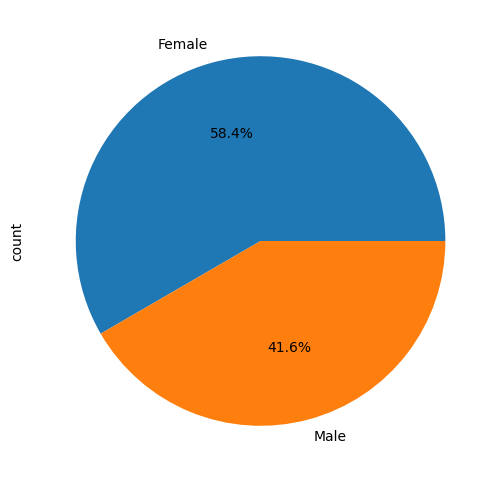

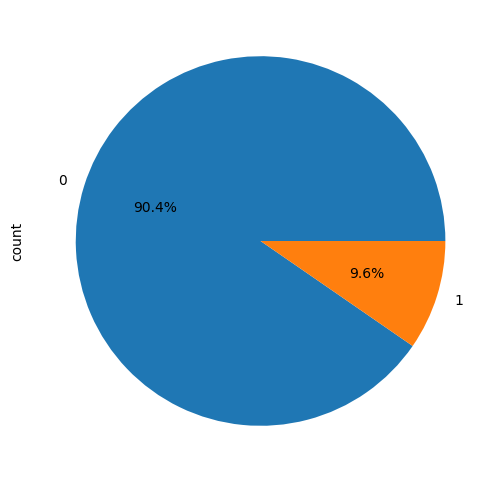

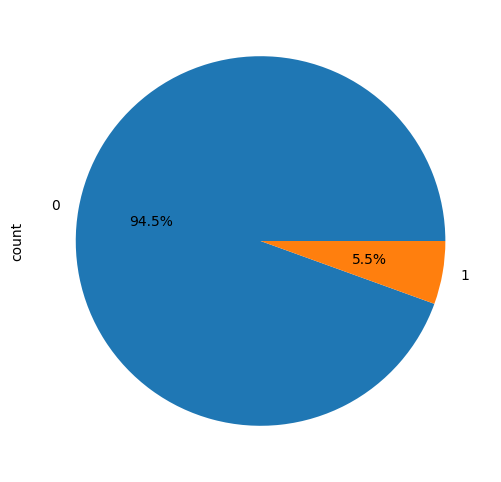

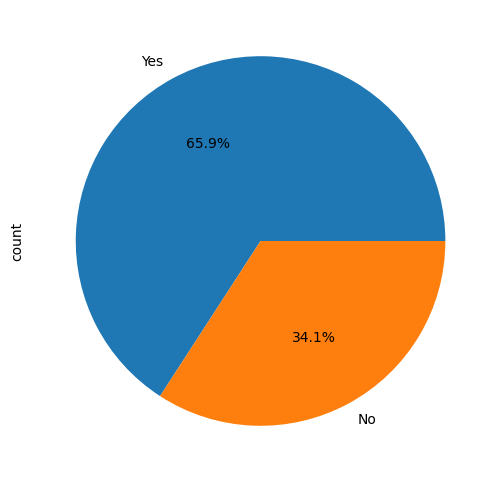

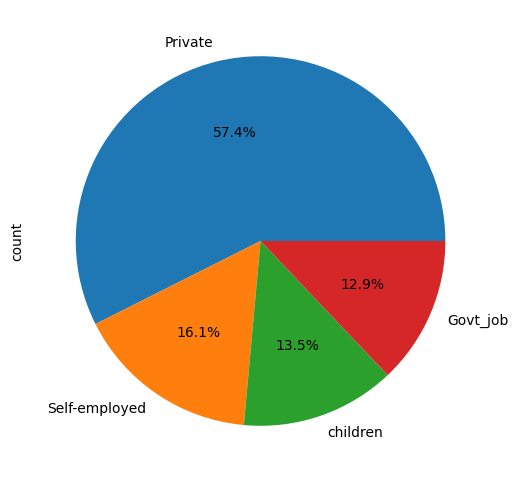

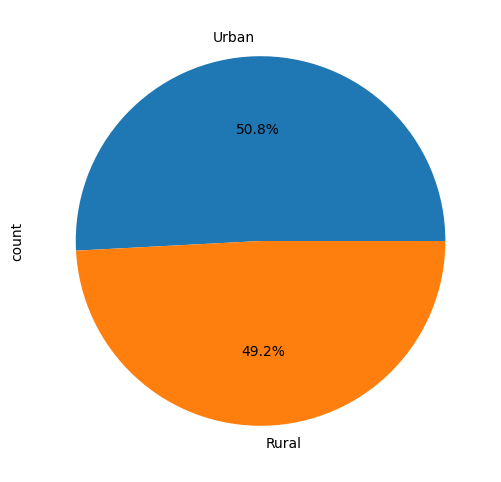

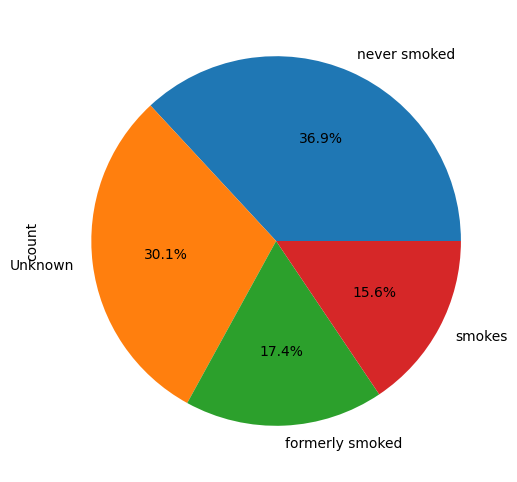

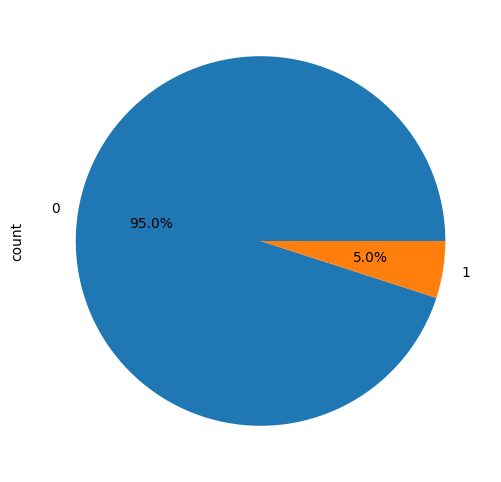

In [14]:
for i in df_col.columns:
    plt.figure(figsize=(15,6))
    df_col[i].value_counts().plot(kind= 'pie', autopct = "%1.1f%%")
    plt.xticks(rotation = 90)
    plt.show()
    



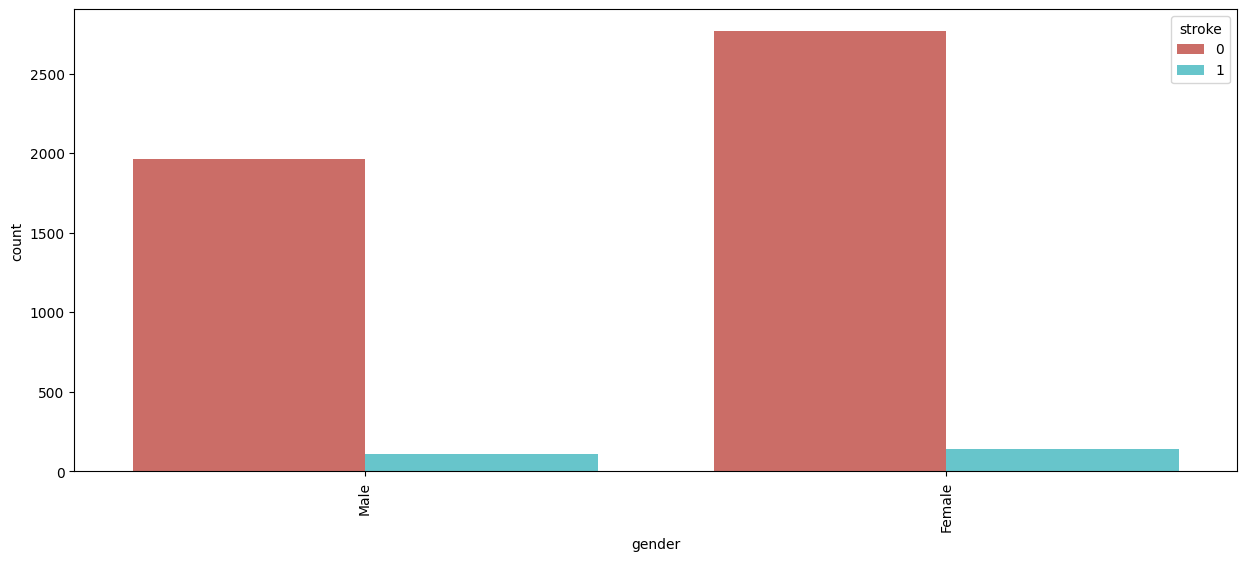

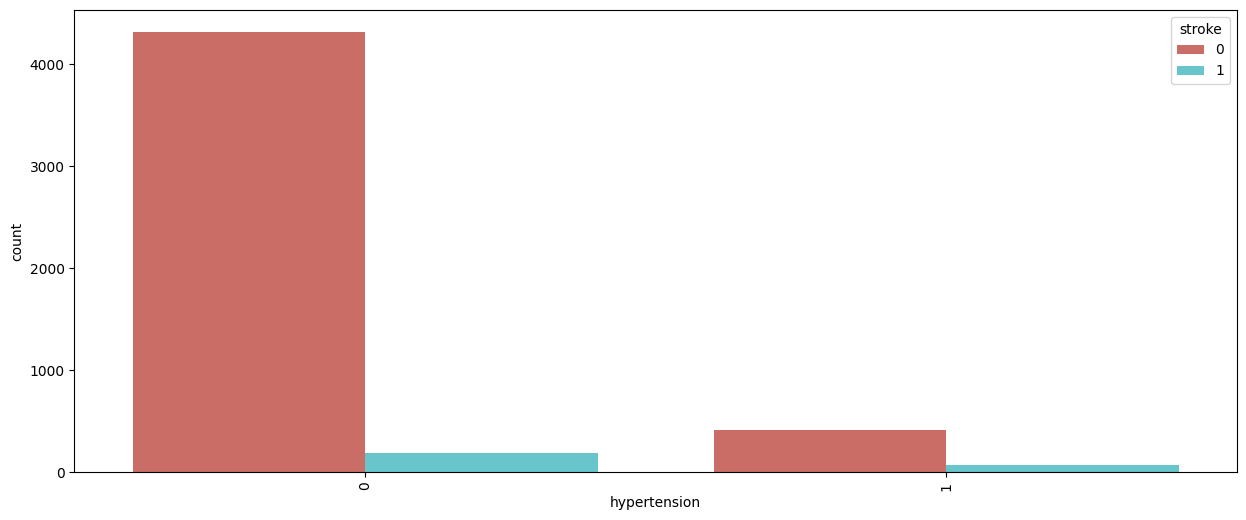

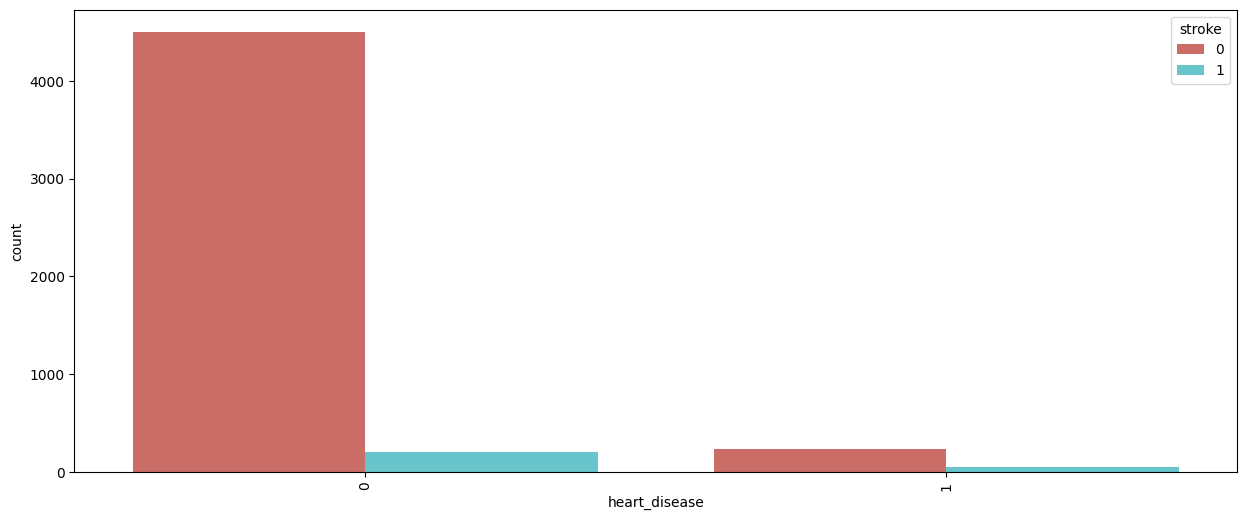

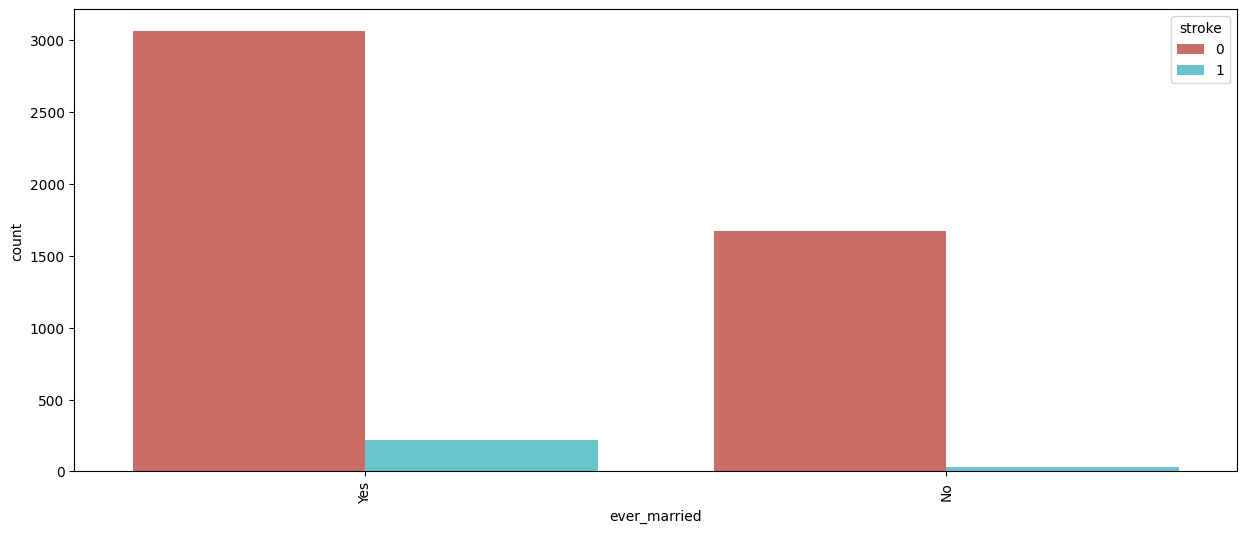

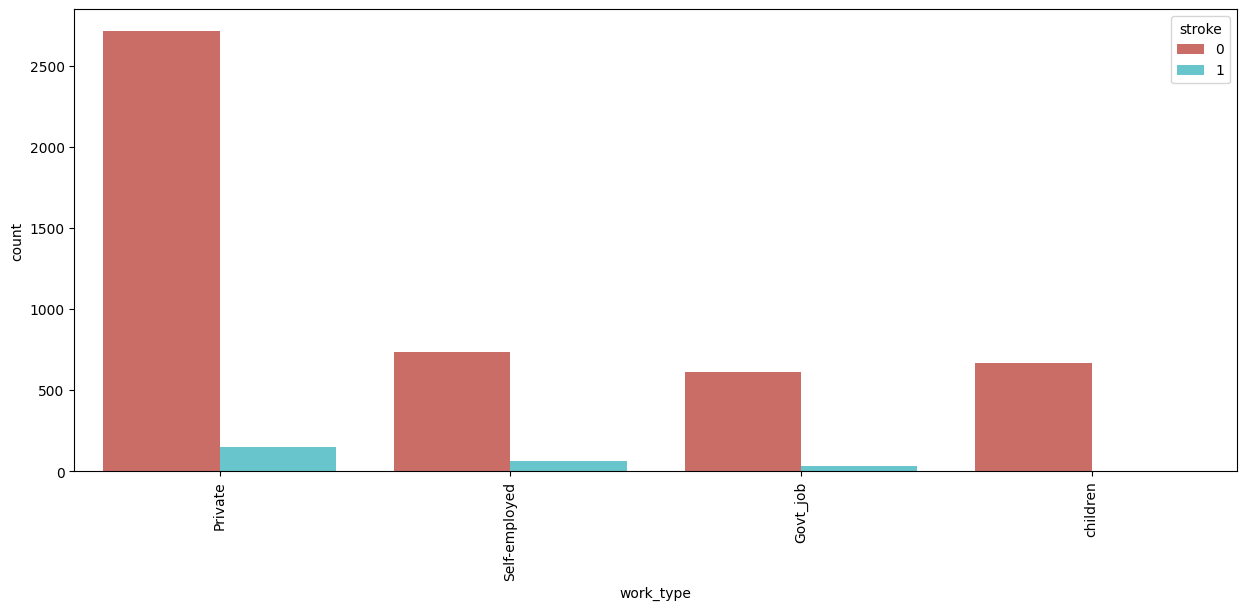

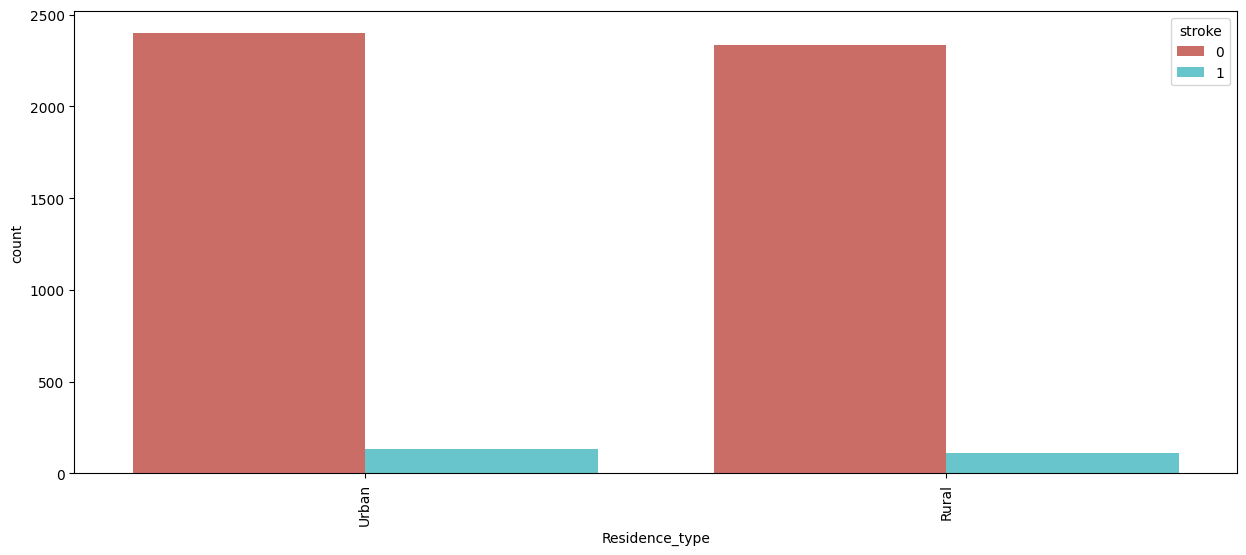

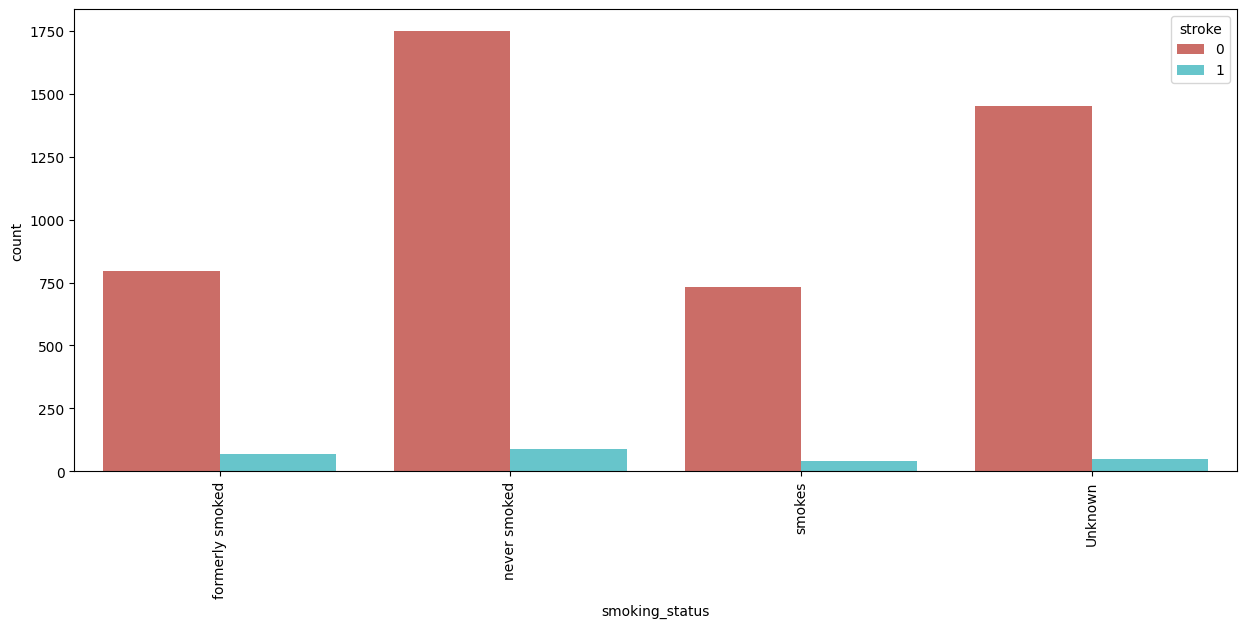

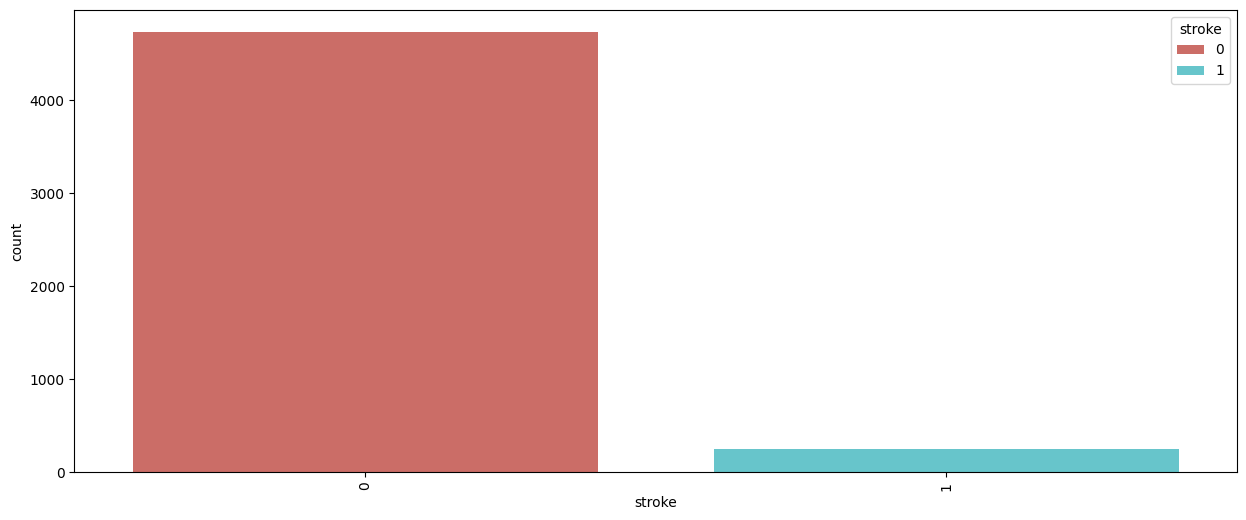

In [15]:
for i in df_col.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(x = i, data = df_col, hue= 'stroke' ,palette="hls")
    plt.xticks(rotation = 90)
    plt.show()

In [16]:
import cufflinks as cf  #Cufflinks helps connect Pandas DataFrames with Plotly to create interactive charts.
cf.go_offline()
cf.set_config_file(offline=False,world_readable = True) # Make charts using the internet, and if uploaded online, make them public so others can see too

In [18]:
gender = df.groupby(df['gender'])['stroke'].sum()

In [19]:
gender

gender
Female    140
Male      108
Name: stroke, dtype: int64

In [20]:
df["gender"] = df["gender"].replace({'Male':0,'Female':1})
df["ever_married"] = df["ever_married"].replace({'Yes':1,'No':0})

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\1915389058.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\DEBJIT   DAS\AppData\Local\Temp\ipykernel_18164\1915389058.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [21]:
onehot = OneHotEncoder()

In [22]:
cat_to_numeric = df[['work_type','Residence_type','smoking_status']]

In [23]:
encoded_array = onehot.fit_transform(cat_to_numeric).toarray()

In [24]:
columns_name = onehot.get_feature_names_out(cat_to_numeric.columns)
df2 = pd.DataFrame(encoded_array,columns=columns_name)

In [25]:
df2.head()

,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [27]:
df.drop(columns=['work_type','Residence_type','smoking_status'],inplace=True)

In [28]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,67.0,0,1,1,228.69,36.6,1
1,0,80.0,0,1,1,105.92,32.5,1
2,1,49.0,0,0,1,171.23,34.4,1
3,1,79.0,1,0,1,174.12,24.0,1
4,0,81.0,0,0,1,186.21,29.0,1


In [29]:
final_df = pd.concat([df,df2],axis=1)

In [30]:
final_df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,228.69,36.6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,80.0,0,1,1,105.92,32.5,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,49.0,0,0,1,171.23,34.4,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,79.0,1,0,1,174.12,24.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,81.0,0,0,1,186.21,29.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,70.15,29.8,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4977,0,40.0,0,0,1,191.15,31.1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4978,1,45.0,1,0,1,95.02,31.8,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4979,0,40.0,0,0,1,83.94,30.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
x = final_df.drop(columns=['stroke'])
y = final_df['stroke']

In [32]:
x

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,228.69,36.6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,80.0,0,1,1,105.92,32.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,49.0,0,0,1,171.23,34.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,79.0,1,0,1,174.12,24.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,81.0,0,0,1,186.21,29.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,70.15,29.8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4977,0,40.0,0,0,1,191.15,31.1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4978,1,45.0,1,0,1,95.02,31.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4979,0,40.0,0,0,1,83.94,30.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

## Now split the dataset using train test split

In [34]:
x_train, x_test, y_train ,y_test = train_test_split(x,y ,test_size=0.25,random_state=42)

In [35]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3735, 17) (1246, 17) (3735,) (1246,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [37]:
logistic = LogisticRegression(random_state=3)

In [38]:
logistic.fit(x_train,y_train)

d:\Users\DEBJIT DAS\Brain stroke prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,3
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
logistic_pred = logistic.predict(x_test)

In [40]:
print(confusion_matrix(y_test,logistic_pred))
print(accuracy_score(y_test,logistic_pred))

[[1177    0]
 [  69    0]]
0.9446227929373997


In [41]:
dec_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dec_clf.fit(x_train,y_train)
y_dec_clf=dec_clf.predict(x_test)

In [42]:
print(confusion_matrix(y_test,y_dec_clf))
print(accuracy_score(y_test,y_dec_clf))

[[1174    3]
 [  69    0]]
0.942215088282504


In [44]:
random = RandomForestClassifier(n_estimators=20,criterion="entropy")

In [45]:
random.fit(x_train,y_train)
y_random_pred = random.predict(x_test)

print(confusion_matrix(y_test,y_random_pred))
print(accuracy_score(y_test,y_random_pred))

[[1173    4]
 [  69    0]]
0.9414125200642055
